# Converting DICOM files to BIDS using Heudiconv

In this notebook, we will discuss the DICOM file format, the Brain Imaging Data Structure (BIDS) format, the importance of BIDS, and demonstrate how to convert DICOM files to BIDS format using Heudiconv.

In [5]:
import os

base_dir = os.path.dirname(os.getcwd())
data_dir = os.path.join(base_dir, "data")
dicom_dir = os.path.join(data_dir, "example_dicom")

## What is DICOM?

DICOM (Digital Imaging and Communications in Medicine) is a standard for transmitting, storing, and sharing medical images. In fMRI scannings, DICOM files are used to store the raw image data and metadata.

## Structure of DICOM folders

In [6]:
!find /home/jovyan/fmri_training/data/example_dicom -type d -print | sed -e 's;[^/]*/;|__;g;s;__|; |;g'

| | | | |__example_dicom
| | | | | |__PA0
| | | | | | |__ST0
| | | | | | | |__SE1
| | | | | | | |__SE2
| | | | | | | |__SE0
| | | | | | | |__SE3
| | | | | | | |__SE4




- PA0 (Patient): This folder represents a specific patient or participant in the study. In some cases, the folder name may contain an anonymized identifier to protect the participant's privacy. In your example, this folder is named "PA0."
- ST0 (Study): This folder represents a specific study or imaging session for the patient. A patient might undergo multiple studies over time, and each study folder contains data for one of those sessions. In your example, this folder is named "ST0."
- SE{0,1,2,3,4} (Series): These folders represent individual series within a study. Each series corresponds to a particular imaging sequence or set of parameters used during the imaging session. In fMRI experiments, a series can represent different functional tasks, anatomical scans, or other imaging modalities acquired during the same session. In your example, there are five series folders: "SE0," "SE1," "SE2," "SE3," and "SE4."


## DICOM files

DICOM files contain both the **image data** and **metadata**.  The metadata includes information about the acquisition parameters, such as the TR, voxel dimensions, slice timing, and orientation.

We can use `pydicom` [link](https://github.com/pydicom/pydicom) to read and inspect DICOM files.

### Image data

The image data represents a time series of 3D volumes, where each volume is acquired at a specific time point (TR, or repetition time)

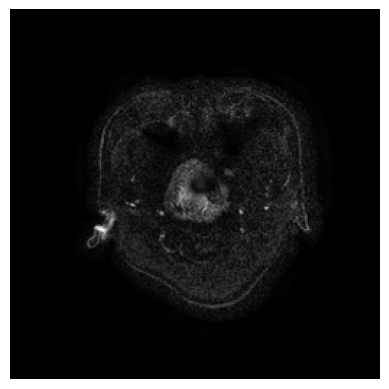

In [7]:
import glob
import pydicom
import matplotlib.pyplot as plt

# Read the DICOM file
file_path = glob.glob(os.path.join(dicom_dir, "PA0", "ST0", "SE4", "*"))[4]
dicom_file = pydicom.dcmread(file_path)

# Get the pixel array from the DICOM file
pixel_array = dicom_file.pixel_array

# Display the image using matplotlib
plt.imshow(pixel_array, cmap=plt.cm.gray)
plt.axis('off')
plt.show()


## Metadata

In [8]:
series_folders = glob.glob(os.path.join(dicom_dir, "PA0", "ST0", "SE*"))
series_folders.sort()
series_folders

['/home/jovyan/fmri_training/data/example_dicom/PA0/ST0/SE0',
 '/home/jovyan/fmri_training/data/example_dicom/PA0/ST0/SE1',
 '/home/jovyan/fmri_training/data/example_dicom/PA0/ST0/SE2',
 '/home/jovyan/fmri_training/data/example_dicom/PA0/ST0/SE3',
 '/home/jovyan/fmri_training/data/example_dicom/PA0/ST0/SE4']

In [9]:
dicom_file = glob.glob(os.path.join(series_folders[3], "*"))[0]

# Read the DICOM metadata using pydicom
metadata = pydicom.dcmread(dicom_file)

In [10]:
metadata

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.283.4120.7586502.15799.1395310301.1
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.840.113619.6.264
(0002, 0013) Implementation Version Name         SH: 'AW4_5_05_001_CTT'
(0002, 0016) Source Application Entity Title     AE: 'MR750'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 764
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'EPI', 'NONE']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID  

- **3Plane Loc SSFSE**: 
  - This is a localizer sequence that acquires scout images in three orthogonal planes (typically axial, sagittal, and coronal) to help plan the subsequent scans in the session. SSFSE stands for Single Shot Fast Spin Echo, which is a rapid imaging sequence used for the localizer.
- **Ax FSPGR 3D**: 
  - This is an anatomical scan using a T1-weighted sequence. Ax refers to the axial plane, FSPGR stands for Fast Spoiled Gradient Recalled Echo, and 3D indicates that it is a three-dimensional acquisition.
- **run1, run2, run3**: 
  - These descriptions suggest that these are functional scans corresponding to different runs of an fMRI experiment. The specific task or condition for each run is not provided in the description.

## What is BIDS?

[BIDS](https://bids.neuroimaging.io/) (Brain Imaging Data Structure) is a standard for organizing and describing neuroimaging datasets. It provides a consistent and easily understandable structure to store imaging data and metadata, making it easier to share, analyze, and understand the data across different research groups.



## Why use BIDS?

- **Ease of data sharing and collaboration:** BIDS provides a common framework to organize and describe neuroimaging data, making it easier to share data with collaborators or public repositories. This promotes open science, data reuse, and reproducibility.
- **Consistency and simplicity:** By following a standardized naming convention and directory structure, BIDS makes it easier to understand and navigate data from different sources. This simplifies data management and can save time when dealing with multiple datasets or projects.
- **Streamlined preprocessing and analysis:** Many popular neuroimaging software tools (e.g., **fMRIPrep** and MRIQC) are BIDS-compatible, which means they can directly read and process BIDS-formatted datasets. This reduces the need for manual data organization and conversion, making preprocessing and analysis more efficient and less error-prone.
- **Metadata management:** BIDS includes a comprehensive set of metadata fields, making it easier to keep track of essential information about the dataset, such as the acquisition parameters, demographics, and experimental conditions. This facilitates data interpretation and comparison across studies.
- **Flexibility and extensibility:** BIDS is designed to accommodate a wide range of neuroimaging modalities, including fMRI, structural MRI, DWI, MEG, and EEG. It also supports the inclusion of derivatives (e.g., preprocessed data, statistical maps), making it a versatile solution for managing complex neuroimaging studies.

## Heudiconv

`heudiconv` operates using a heuristic which, given metadata from DICOMs, would decide how to name resultant (from conversion using `dcm2niix`) files. 

### Rename subfolder

from `date-subjectname` to `sub-01`, `sub-02`

See this [file](https://github.com/yes-lab-ucsb/expectation_fmri2014/blob/main/code/2_rename_sub-folders.py)

sub-01
  └── PA0
      └── ST0
          ├── SE0
          ├── SE1
          ├── SE2
          ├── SE3
          └── SE4

### Create `heuristic.py` file

See this [file](https://github.com/yes-lab-ucsb/expectation_fmri2014/blob/main/code/3_heuristic.py)

In [ ]:
import os

def create_key(template, outtype=('nii.gz',), annotation_classes=None):
    """
    This function is used to create a key that specifies the output path and file format for a particular scan type.
    """
    if template is None or not template:
        raise ValueError('Template must be a valid format string')
    return template, outtype, annotation_classes

def infotodict(seqinfo):
    """
    This function takes the sequence information (seqinfo) as input and returns a dictionary that maps scan types to the corresponding series IDs in the input DICOM files.
    """
    # Anatomical
    t1w = create_key('sub-{subject}/anat/sub-{subject}_T1w')

    # Functional
    func = create_key('sub-{subject}/func/sub-{subject}_task-expectation_run-{item:02d}_bold')

    info = {t1w: [], func: []}

    for s in seqinfo:
        series_desc = s.series_description.lower()
        
        # Identify the anatomical scan
        if 'fspgr' in series_desc or 't1' in series_desc:
            info[t1w].append(s.series_id)
        # Identify the functional scans
        elif 'run' in series_desc:
            info[func].append(s.series_id)
        # Add more conditions to identify other types of scans, if necessary

    return info

In [1]:
!heudiconv

usage: heudiconv [-h] [--version]
                 [-d DICOM_DIR_TEMPLATE | --files [FILES ...]]
                 [-s [SUBJS ...]] [-c {dcm2niix,none}] [-o OUTDIR]
                 [-l LOCATOR] [-a CONV_OUTDIR] [--anon-cmd ANON_CMD]
                 [-f HEURISTIC] [-p] [-ss SESSION]
                 [-b [BIDSOPTION1 [BIDSOPTION2 ...]]] [--overwrite]
                 [--datalad] [--dbg]
                 [--command {heuristics,heuristic-info,ls,populate-templates,sanitize-jsons,treat-jsons,populate-intended-for}]
                 [-g {studyUID,accession_number,all,custom}] [--minmeta]
                 [--random-seed RANDOM_SEED] [--dcmconfig DCMCONFIG]
                 [-q {SLURM,None}] [--queue-args QUEUE_ARGS]

Example: heudiconv -d 'rawdata/{subject}' -o . -f heuristic.py -s s1 s2 s3

options:
  -h, --help            show this help message and exit
  --version             show program's version number and exit
  -d DICOM_DIR_TEMPLATE, --dicom_dir_template DICOM_DIR_TEMPLATE
          

### Run `heudiconv`

Run the following command in terminal or jupyter notebook (need to add `!`)
```bash
heudiconv -d /home/local/PSYCH-ADS/{yourname}/YES_lab/Projects/expectation_fmri2014/raw_data/sub-{subject}/PA0/ST0/SE*/* \
           -s 01 \
           -f /home/local/PSYCH-ADS/{yourname}/YES_lab/Projects/expectation_fmri2014/code/3_heuristic.py \
           -c dcm2niix \
           -b \
           -o /home/local/PSYCH-ADS/{yourname}/YES_lab/Projects/expectation_fmri2014/output/BIDS
```
- -d, --dicom_dir_template: Location of dicomdir that can be indexed with subject id {subject} and session {session}
- -s, --subjects: List of subjects - required for dicom template. 
- -c, --converter: Tool to use for DICOM conversion.
- -b, --bids: Flag for output into BIDS structure.
- -o, --outdir: Output directory for conversion setup (for further customization and future reference. 

More information about arguments see [here](https://heudiconv.readthedocs.io/en/latest/usage.html#named-arguments)

In [ ]:
heudiconv -d /home/local/PSYCH-ADS/{yourname}/YES_lab/Projects/expectation_fmri2014/raw_data/sub-{subject}/PA0/ST0/SE*/* \
           -s 01 \
           -f /home/local/PSYCH-ADS/{yourname}/YES_lab/Projects/expectation_fmri2014/code/3_heuristic.py \
           -c dcm2niix \
           -b \
           -o /home/local/PSYCH-ADS/{yourname}/YES_lab/Projects/expectation_fmri2014/output/BIDS